<a href="https://colab.research.google.com/github/bibersay/Deep-Project/blob/main/AlexNet(2012).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, losses
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(layers.experimental.preprocessing.Resizing(227,227, interpolation='bilinear',input_shape=x_train.shape[1:]))
model.add(Conv2D(96,11,strides=4, activation='relu', padding='same'))
model.add(MaxPool2D(3,strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256,5,strides=1, activation='relu', padding='same'))
model.add(MaxPool2D(2,strides=2))
model.add(BatchNormalization())

model.add(Conv2D(384,3,strides=1, activation='relu', padding='same'))
model.add(Conv2D(384,3,strides=1, activation='relu', padding='same'))
model.add(Conv2D(256,3,strides=1, activation='relu', padding='same'))
model.add(MaxPool2D(3,strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs=5, verbose=1, validation_data =(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 58s 146ms/step - loss: 1.3529 - accuracy: 0.5218 - val_loss: 4.0409 - val_accuracy: 0.2944
Epoch 2/5
391/391 [==============================] - 57s 145ms/step - loss: 1.1111 - accuracy: 0.6098 - val_loss: 1.1101 - val_accuracy: 0.6121
Epoch 3/5
391/391 [==============================] - 57s 145ms/step - loss: 0.9445 - accuracy: 0.6729 - val_loss: 1.3928 - val_accuracy: 0.5471
Epoch 4/5
391/391 [==============================] - 57s 145ms/step - loss: 0.8367 - accuracy: 0.7114 - val_loss: 0.8873 - val_accuracy: 0.6969
Epoch 5/5
391/391 [==============================] - 57s 145ms/step - loss: 0.7338 - accuracy: 0.7481 - val_loss: 0.8854 - val_accuracy: 0.6960


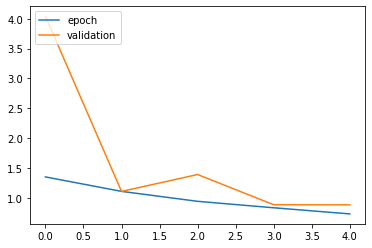

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['epoch', 'validation'], loc='upper left')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['epoch', 'validation'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score[0], score[1])
predictions = model.predict(x_test, verbose=1)

313/313 [==============================] - 4s 14ms/step - loss: 0.8854 - accuracy: 0.6960
0.8854313492774963 0.6959999799728394
313/313 [==============================] - 4s 12ms/step


In [ ]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axs = plt.subplots(10, 2, figsize=(12,24))
    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes    
    arr_features = [None]*10
    arr_predictions = np.zeros((10, 10))
    last_image_i = 0
    
    for i, prediction in enumerate(predictions):
        label_id = label_ids[i]
        feature = features[i]
        arr_features[label_id] = feature
        max_id = np.argmax(prediction)
        arr_predictions[label_id][max_id] += 1
        last_image_i = i

    arr_predictions /= last_image_i
    
    for i in range(10):
      feature = arr_features[i]
      pred_name = label_names[i]
      prediction = arr_predictions[i]
      axs[i][0].imshow(feature)
      axs[i][0].set_title(pred_name)
      axs[i][0].set_axis_off()

      axs[i][1].barh(ind + margin, prediction, width)
      axs[i][1].set_yticks(ind + margin)
      axs[i][1].set_yticklabels(label_names)

    plt.tight_layout()